# Машинное обучение, DS-поток
## Задание ML.15


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 20 баллов;
* Задача 2 &mdash; 100 баллов.

In [2]:
# Bot check

# HW_ID: ds_ml15
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
import sklearn.datasets as datasets
from sklearn.decomposition import PCA

from tqdm import tqdm

sns.set(palette='Set2')

---
### Задача 1 
Проведите свое исследование датасета из `data.txt` на кластеризацию изученными методами, реализованными в sklearn:

- k-means;
- DBSCAN;
- Иерархическая кластеризация.

Для каждого метода выше обоснуйте, почему выбранные вами гиперпараметры оптимальны, исходя из внутренней структуры данных. Если вы не можете применить какой-то из методов на этих данных, то обоснуйте, почему.

*Примечание.* Задача является небольшим упражнением и не предполагает большое исследование.

In [4]:
data = np.loadtxt('data.txt')

Отобразим наши данные.

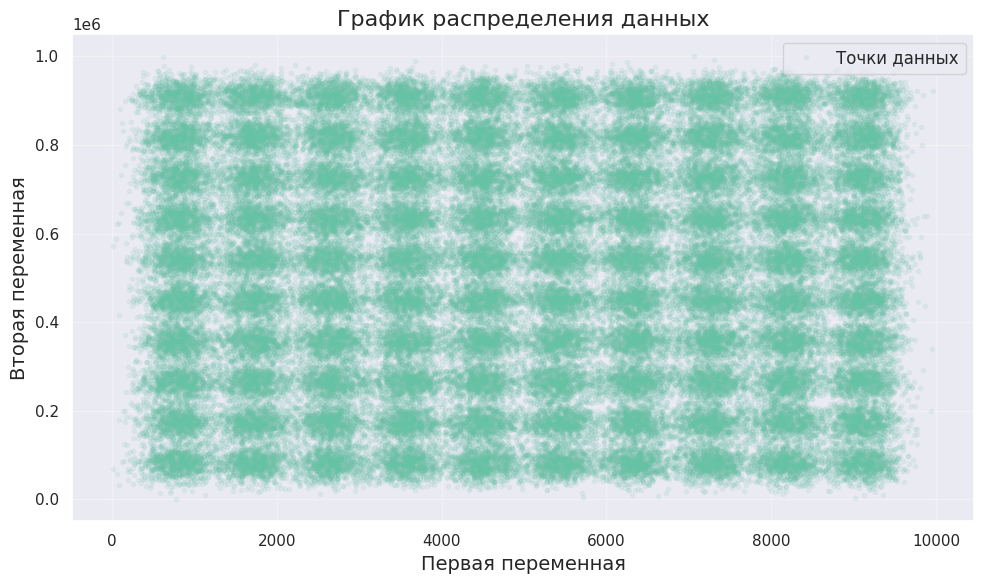

In [5]:
plt.figure(figsize=(10, 6))

plt.plot(data[:, 0], data[:, 1], ls='', marker='.', alpha=0.1, label="Точки данных")

plt.title("График распределения данных", fontsize=16)
plt.xlabel("Первая переменная", fontsize=14)
plt.ylabel("Вторая переменная", fontsize=14)
plt.grid(alpha=0.3)

# Легенда
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


Видим, несколько равноудаленных кластеров. Тем не менее данные надо отскалировать.

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

K-Means.

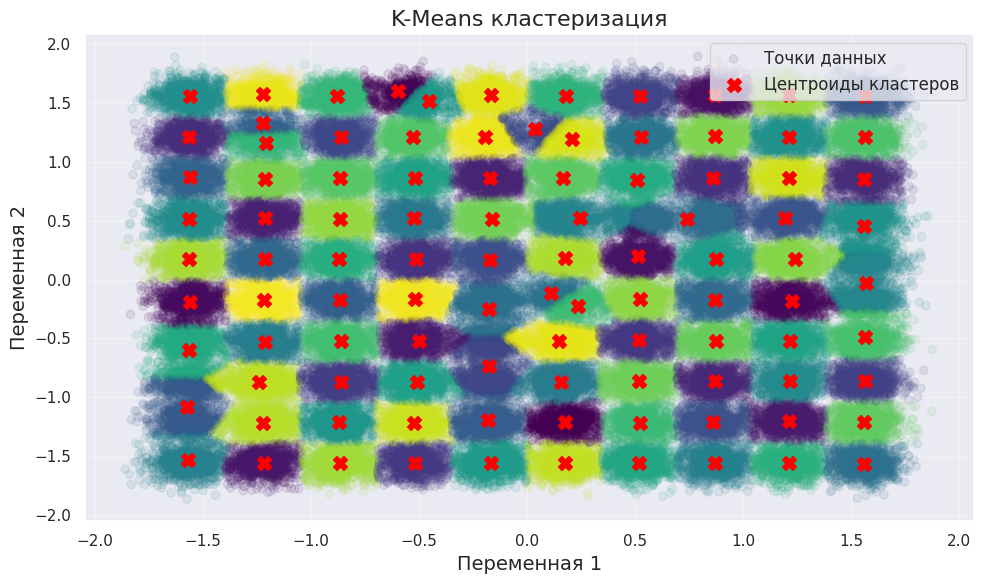

In [7]:
kmeans = KMeans(n_clusters=100, random_state=42)
kmeans.fit(data_scaled)

y_pred = kmeans.predict(data_scaled)

plt.figure(figsize=(10, 6))

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_pred, cmap='viridis', alpha=0.1, label="Точки данных")

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Центроиды кластеров')

plt.title("K-Means кластеризация", fontsize=16)
plt.xlabel("Переменная 1", fontsize=14)
plt.ylabel("Переменная 2", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Как видим, K-means прекрасно справился с кластеризацией.

DBSCAN

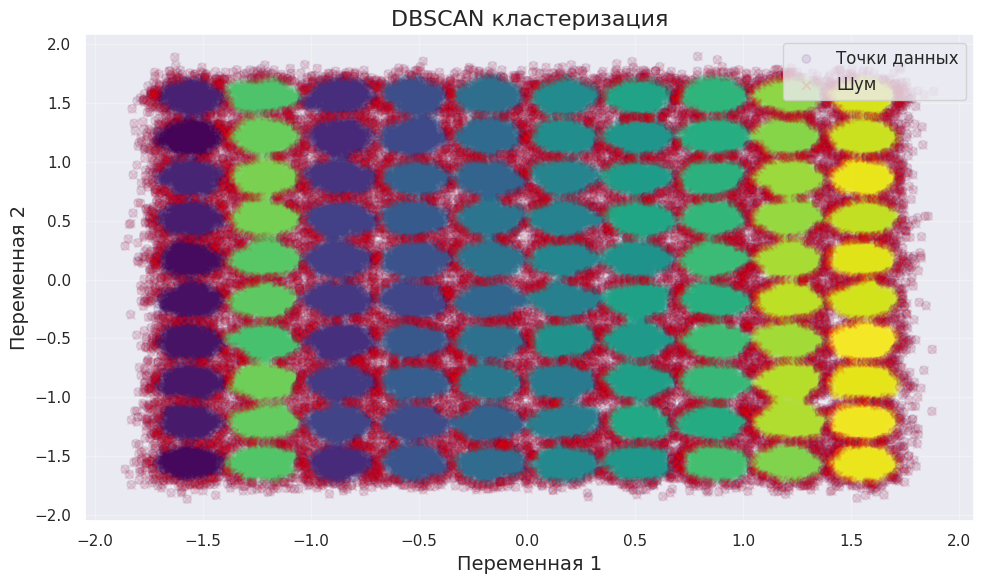

In [8]:
db = DBSCAN(eps=0.05, min_samples=75)
db.fit(data_scaled)

y_pred = db.labels_

plt.figure(figsize=(10, 6))

plt.scatter(
    data_scaled[:, 0], data_scaled[:, 1],
    c=y_pred, cmap='viridis', alpha=0.1, label="Точки данных"
)

if -1 in y_pred:
    plt.scatter(
        data_scaled[y_pred == -1, 0], data_scaled[y_pred == -1, 1],
        c='red', marker='x', alpha=0.1, label='Шум'
    )

plt.title("DBSCAN кластеризация", fontsize=16)
plt.xlabel("Переменная 1", fontsize=14)
plt.ylabel("Переменная 2", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:
len(set(y_pred))

101

Как видим, DBSCAN тоже справился с кластеризацией и нашел желаемые 100 кластеров (последний кластер это набор шумовых кординат)

Иерархическая кластеризация.

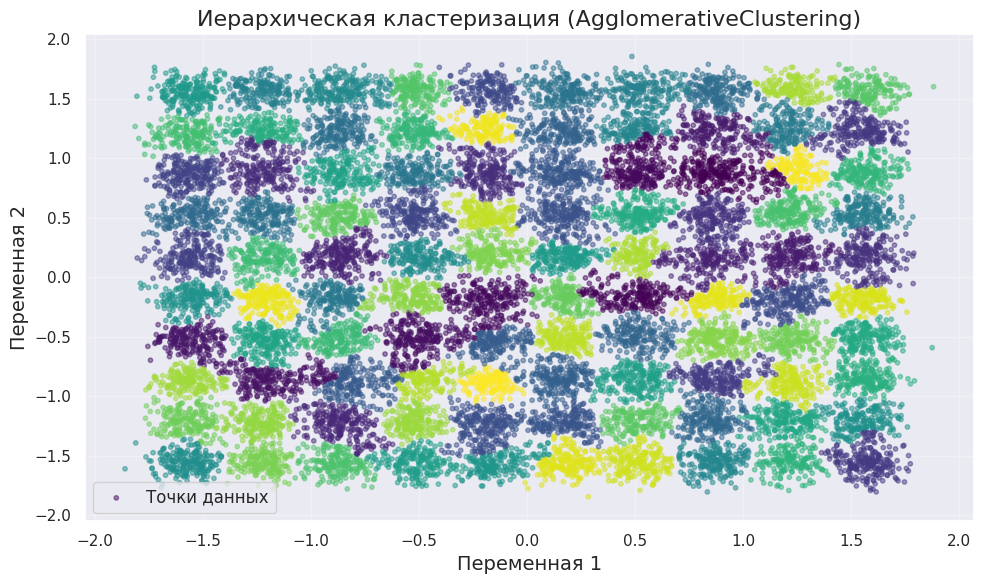

In [10]:
agglomerat = AgglomerativeClustering(n_clusters=100)

sample_size = 20000

indices = np.random.choice(data_scaled.shape[0], size=sample_size, replace=False)
data_agglomerat= data_scaled[indices]

agglomerat.fit(data_agglomerat)

y_pred = agglomerat.labels_

plt.figure(figsize=(10, 6))

plt.scatter(
    data_agglomerat[:, 0], data_agglomerat[:, 1],
    c=y_pred, cmap='viridis', alpha=0.5, s=10, label="Точки данных"
)

plt.title("Иерархическая кластеризация (AgglomerativeClustering)", fontsize=16)
plt.xlabel("Переменная 1", fontsize=14)
plt.ylabel("Переменная 2", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
len(set(y_pred))

100

Как видим, иерархическая кластеризация тоже смогла правильно решить задачу кластеризацию, и найти желаемые равноудаленные кластеры, которые мы выделили при начальном визуальном анализе.

**Вывод:** Как видим, все методы показали приемлимый результат. Оптимальность параметров в данном случае следует из согласованности результата с изначальным визуальным анализом.

---
### Задача 2
Скачайте <a href="https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis">данные</a> о клиентах некоторой торговой сети.

Цель задачи &mdash; кластеризовать клиентов с целью модификации продукта под разные типы пользовательских кластеров. Например, вместо того, чтобы тратиться на продвижение нового продукта каждому клиенту, можно продавать продукт только в том кластере, где клиенты с наибольшей вероятностью его купят.

In [37]:
data = pd.read_csv("./marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

Посмотрим на признаки. Прочитайте также информацию о признаках на странице данных.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Посмотрим на диапазон дат регистрации

In [39]:
data["Dt_Customer"].min(), data["Dt_Customer"].max()

('01-01-2013', '31-12-2013')

Кажется, данные выгружены в конце 2014 года, соответственно, определим дату анализа

In [40]:
end_date = pd.Timestamp('2015-01-01')

Посчитаем для каждого клиента количество дней с момента регистрации

In [41]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
data["usage_time"] = (end_date - data["Dt_Customer"]) / pd.Timedelta('1 day')
data["usage_time"]

0       849.0
1       299.0
2       498.0
3       325.0
4       347.0
        ...  
2235    567.0
2236    205.0
2237    341.0
2238    342.0
2239    808.0
Name: usage_time, Length: 2240, dtype: float64

Создайте следующие признаки:
* возраст клиента на основе даты рождения
* сумма покупок по всем категориям
* общее количество детей, сложив `Kidhome` и `Teenhome`
* на основе количества детей и семейного положения (`Marital_Status`) определите *предполагаемый* размер семьи
* средние траты клиента в день в период пользования сервисом, поделив суммарные траты на количество дней от даты регистрации (*см. примечание далее*)

In [42]:
data["Age"] = end_date.year - data["Year_Birth"]

data["Total_Purchase"] = (
    data["MntWines"]
    + data["MntFruits"]
    + data["MntMeatProducts"]
    + data["MntFishProducts"]
    + data["MntSweetProducts"]
    + data["MntGoldProds"]
)

data["Total_Kids"] = data["Kidhome"] + data["Teenhome"]

data["Family_Size"] = data["Total_Kids"] + (
    data["Marital_Status"].isin(["Together", "Married"]).astype(int)
)

data["Spend_Per_Day"] = data["Total_Purchase"] / data["usage_time"]

In [43]:
data.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-09-04       58       635  ...         0              3         11   
1  2014-03-08       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-02-10       26        11  ...         0              3         11   
4  2014-01-19       94       173  ...         0              3         11   
5  2013-09-09       16       520  ...         0              3         11   
6  2012-11-13       34       235  ...         0              3         11   
7  2013-05-08       32        76  ...         0              3         11   
8  2013-06-06       19        14  ...         0              3         11   
9  2014-03-13       68        28  ...         0              3         11   

   Response  usage_time  Age  Total_Purchase  Total_Kids  Family_Size  \
0         1       849.0   58            1617           0            0   
1         0       299.0   61              27           2            2   
2         0       498.0   50             776           0            1   
3         0       325.0   31              53           1            2   
4         0       347.0   34             422           1            2   
5         0       479.0   48             716           1            2   
6         0       779.0   44             590           1            1   
7         0       603.0   30             169           1            2   
8         1       574.0   41              46           1            2   
9         0       294.0   65              49           2            3   

   Spend_Per_Day  
0       1.904594  
1       0.090301  
2       1.558233  
3       0.163077  
4       1.216138  
5       1.494781  
6       0.757381  
7       0.280265  
8       0.080139  
9       0.166667  

[10 rows x 35 columns]

*Примечание.* 

Клиент может перестать пользоваться сервисом спустя какое-то время, поэтому корректнее было бы делить на время пользования сервисом. В данных не сказано о том, в каких случаях клиента можно отнести в отток, а так же не указан принцип выгрузки данных (все клиенты или только активные), но имеется признак `Recency` &mdash; количество дней с момента последней покупки клиента. 

Исследуйте этот признак и попробуйте понять, можно ли из данных сделать вывод о том, какие типы клиентов присутствуют в данных, каких клиентов можно отнести в отток. Если это сделать удалось, то при вычислении средних трат клиента в день делить нужно на количество дней использования сервиса в случае, если клиент попал в отток. Если клиент активен, то мы считаем, что он до сих пор пользуется сервисом, даже если последнюю покупку он совершал несколько дней назад.

Попробуем посмотреть на распределение.

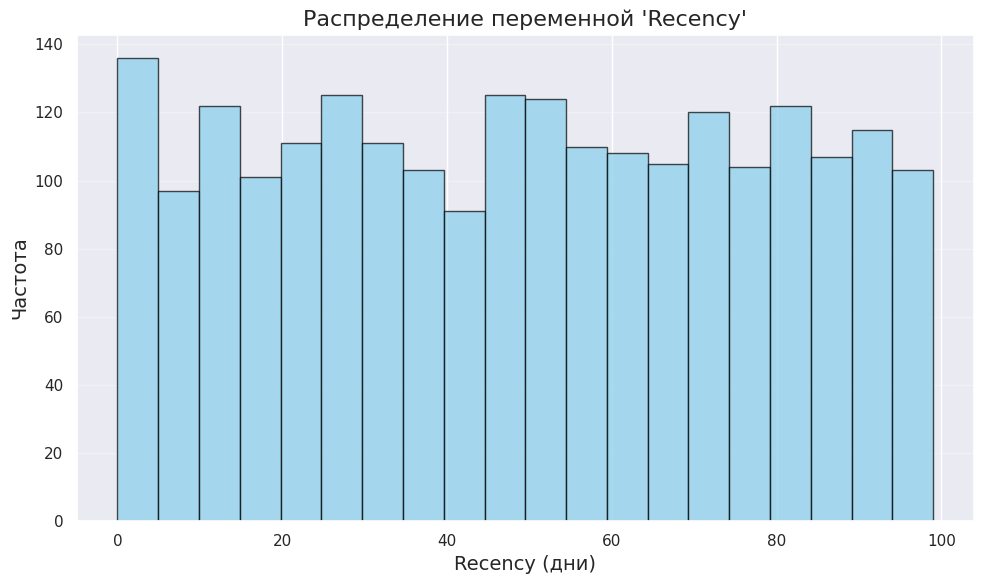

In [44]:
plt.figure(figsize=(10, 6))  
plt.hist(data["Recency"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

plt.title("Распределение переменной 'Recency'", fontsize=16)
plt.xlabel("Recency (дни)", fontsize=14)
plt.ylabel("Частота", fontsize=14)

plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Как видим, данные распределены достаточно равномерно и непрерывно, так что мы можем отсюда вытащить людей которые активны, и тех, кто попал в отток.

Будем считать активными тех, кто был активен в последний месяц.

In [45]:
data["Is_Active"] = (data["Recency"] < 30).astype(int)

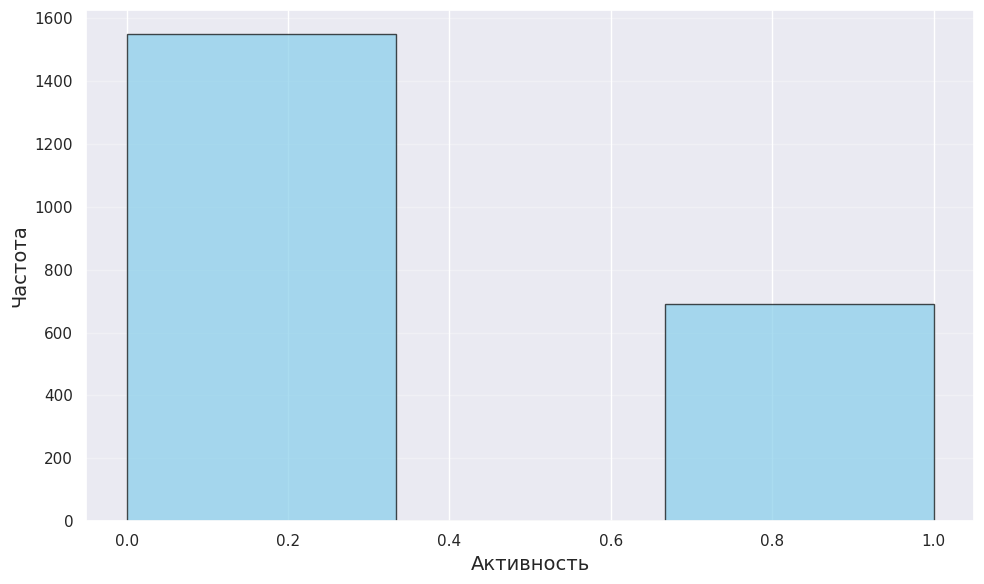

In [46]:
plt.figure(figsize=(10, 6))  
plt.hist(data["Is_Active"], bins=3, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel("Активность", fontsize=14)
plt.ylabel("Частота", fontsize=14)

plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Пересчитаем траты в день

In [47]:
data["Spend_Per_Day"] = data["Total_Purchase"] / (
    data["usage_time"] - data["Recency"] * (data["Is_Active"] == 0)
)


Далее будем работать с признаками:
* возраст клиента
* предполагаемый размер семьи
* средние траты клиента в день
* `Income` &mdash; годовой доход клиента

Проведите графическое исследование признаков. При необходимости выполните предобработку, обосновав ее необходимость.

In [48]:
features = ["Age", "Family_Size", "Spend_Per_Day", "Income"]
new_data = data[features]

In [49]:
new_data.head()

Age  Family_Size  Spend_Per_Day   Income
0   58            0       2.044248  58138.0
1   61            2       0.103448  46344.0
2   50            1       1.558233  71613.0
3   31            2       0.163077  26646.0
4   34            2       1.667984  58293.0

Есть ли в полученных данных пропуски? Если да, то насколько много, можно ли их удалить?

In [50]:
new_data.shape

(2240, 4)

In [51]:
new_data.isnull().sum()

Age               0
Family_Size       0
Spend_Per_Day     0
Income           24
dtype: int64

Как видим из 2240 строк имеет всего 24 пропуска в графе доходов. Тогда их можно удалить почти без потери информации

In [52]:
new_data = new_data.dropna()
new_data.shape

(2216, 4)

Перейдем к кластеризации клиентов. Какой метод кластеризации будете использовать и почему? Как определить оптимальное количество кластеров или, в зависимости от метода, других гиперпараметров?

Для начала выполним стандартизацию

In [53]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(new_data), columns=features)

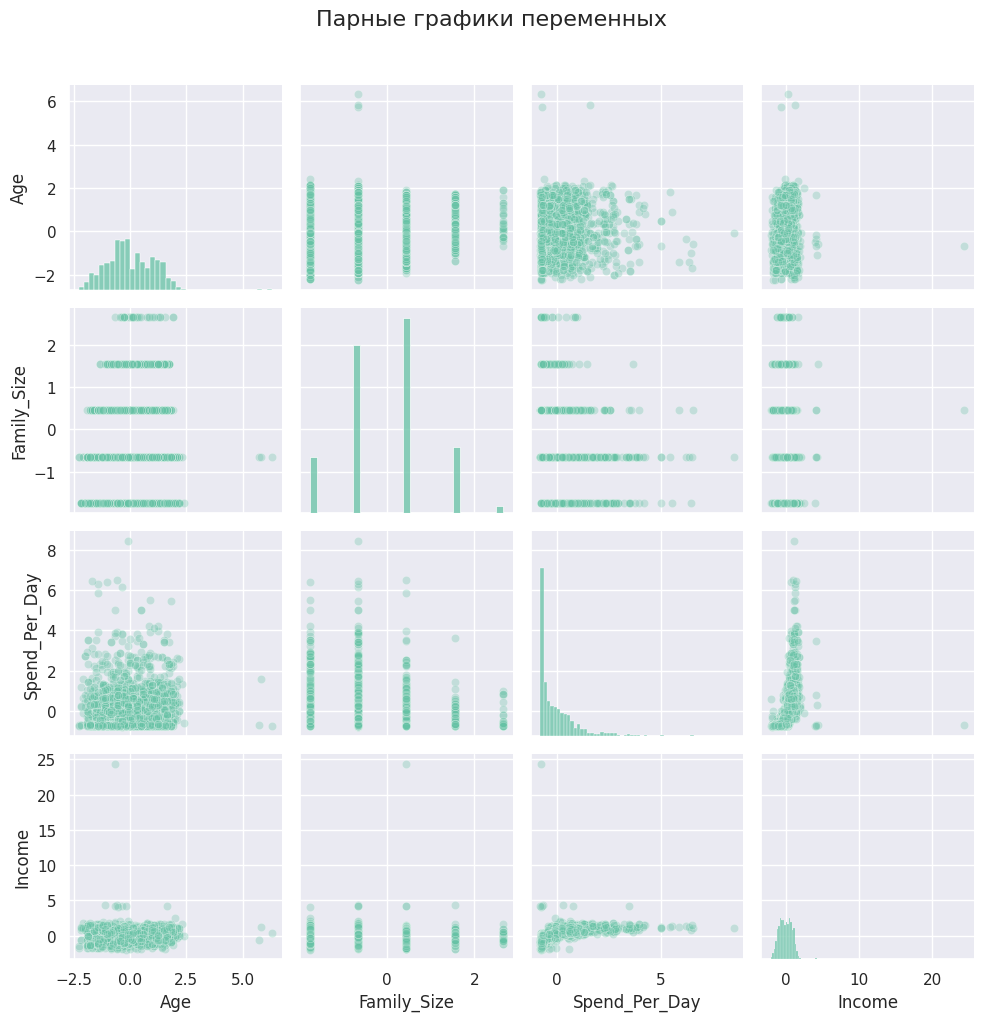

In [54]:
sns.pairplot(data_scaled, plot_kws={'alpha': 0.3})
plt.suptitle("Парные графики переменных", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Попробуем использовать DBSCAN. В случае адекватности его работы оставим, иначе заменим. Оптимальные параметры будем искать используя силуэты.

In [593]:
'''
eps = 2.0
min_samples = 22
'''

eps = 2.1
min_samples = 22

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)

new_data["Cluster"] = clusters

unique_clusters = set(clusters)
unique_clusters.discard(-1)
n_clusters = len(unique_clusters)

print(f"Количество кластеров (без шума): {n_clusters}")

Количество кластеров (без шума): 4


Выполните кластеризацию этим методом и подберите оптимальное количество гиперпараметров.

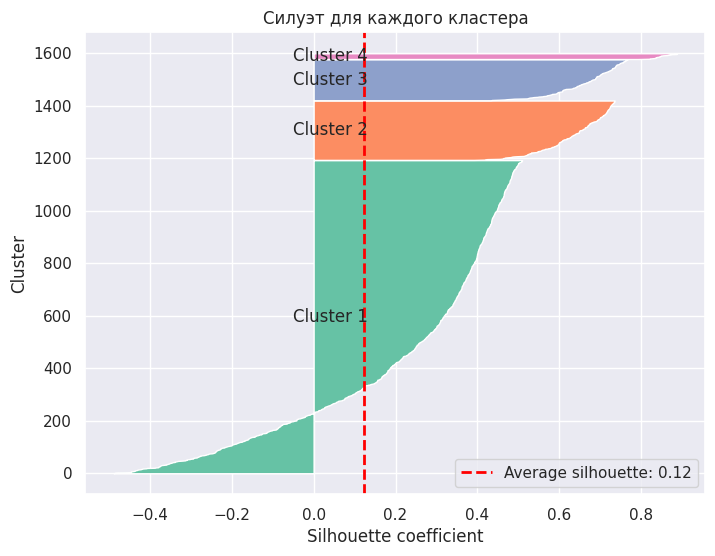

In [594]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(data_scaled, clusters)

avg_silhouette_all = np.mean(silhouette_vals)

fig, ax = plt.subplots(figsize=(8, 6))
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    ax.text(
        -0.05,
        (y_lower + y_upper) / 2,
        f"Cluster {i + 1}",
        fontsize=12,
        verticalalignment="center",
    )
    y_lower += len(cluster_silhouette_vals)

ax.axvline(
    avg_silhouette_all,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Average silhouette: {avg_silhouette_all:.2f}",
)

ax.set_title("Силуэт для каждого кластера")
ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster")
ax.legend()
plt.show()

Сколько элементов в каждом из полученных кластеров?

Проинтерпретируйте полученные кластеры с помощью визуального анализа. Используйте различные типы графиков (например, box plot), изученные ранее. По каким признакам кластеры различаются, на сколько? Как можно описать клиентов каждого кластера?

Насколько кластеры соприкасаются друг с другом? Что можно сказать про клиентов на границе кластеров?

Посмотрим, сколько человек в каждом кластере.

In [595]:
new_data["Cluster"].value_counts()

Cluster
 0    1193
-1     616
 1     227
 2     157
 3      23
Name: count, dtype: int64

In [596]:
new_data.head()

Age  Family_Size  Spend_Per_Day   Income  Cluster
0   58            0       2.044248  58138.0       -1
1   61            2       0.103448  46344.0        0
2   50            1       1.558233  71613.0        0
3   31            2       0.163077  26646.0        0
4   34            2       1.667984  58293.0        0

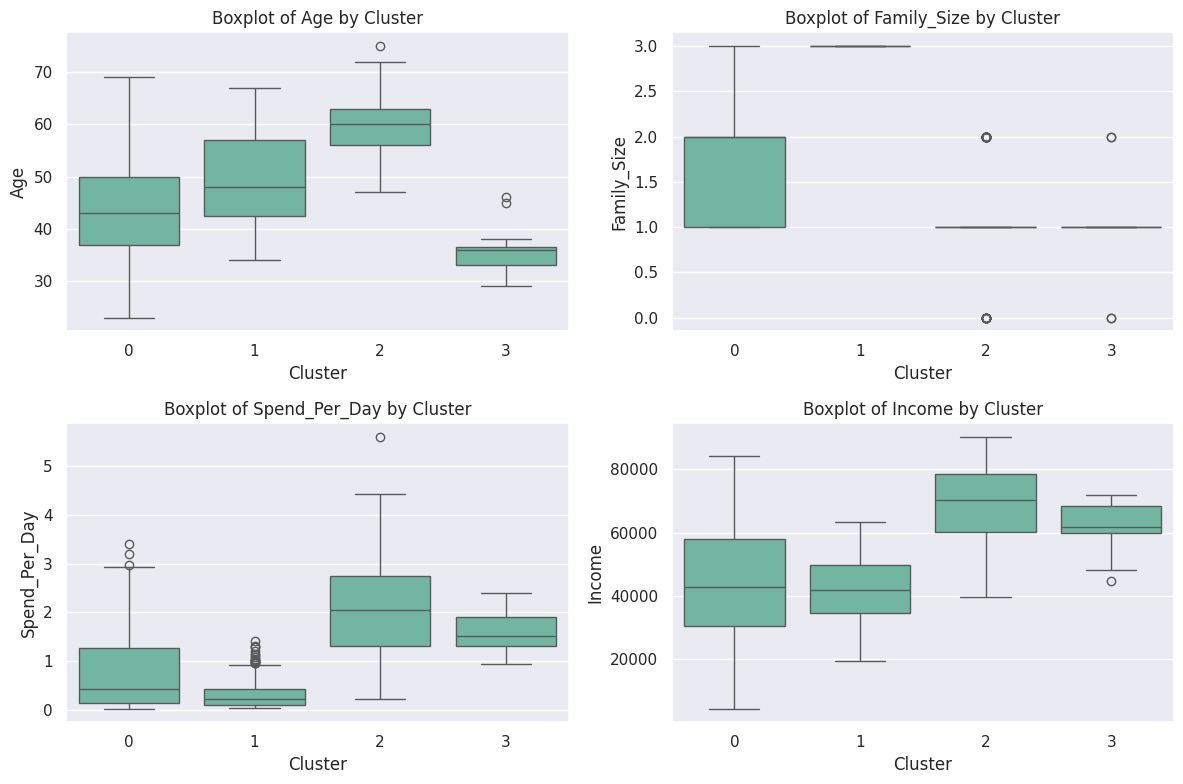

In [597]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Cluster", y=feature, data=new_data[new_data["Cluster"] != -1])
    plt.title(f"Boxplot of {feature} by Cluster")
plt.tight_layout()
plt.show()


Видим, что кластеры не имеют многов выбросов.

Посмотрим на среднее между кластерами.

In [598]:
cluster_means = new_data[new_data["Cluster"] != -1].groupby("Cluster")[features].mean()
cluster_means

Age  Family_Size  Spend_Per_Day        Income
Cluster                                                     
0        43.832355     1.718357       0.746673  44090.388097
1        49.356828     3.000000       0.314678  41788.885463
2        59.318471     1.095541       2.075716  68535.273885
3        35.347826     1.000000       1.622263  62498.565217

Видим, что выделились три группы:
* Люди порядка 45 лет, имеющие в среднем одного-двух детей, с умеренным доходом и небольшими ежедневными тратами

* Люди возраста ближе к 50, имеющие большую семью и невысокие доходы, а также низкие ежедневные траты

* Пожилые люди, ближе к 60, имеющие 0 и 1 ребенка, но имеющие высокий доход и большие ежедневные траты.

Получается, на границах кластеров, будут лежать что-то среднее между упомянутыми группами.

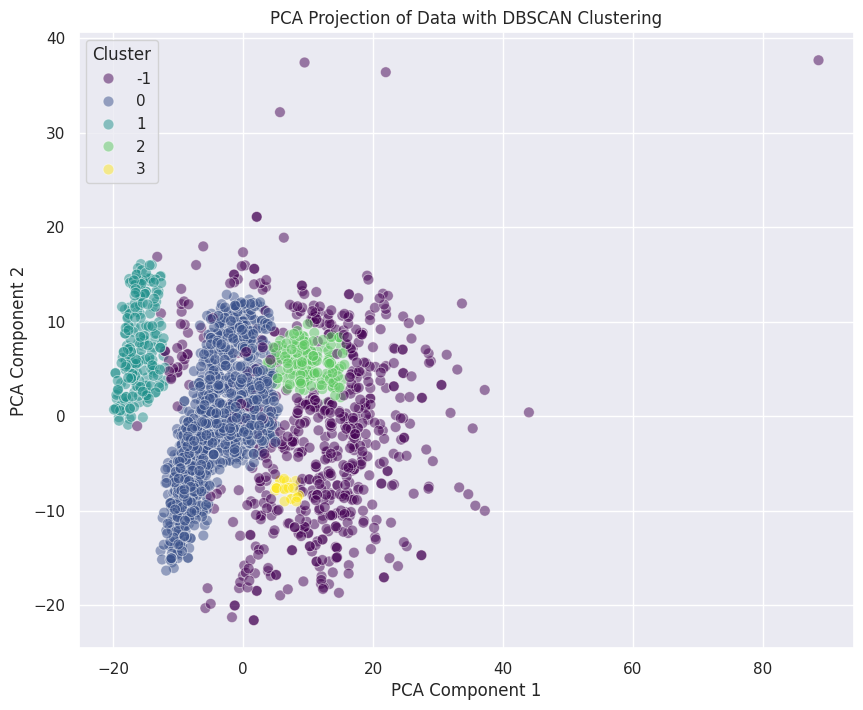

In [599]:
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_embedding[:, 0], y=pca_embedding[:, 1], hue=clusters, palette='viridis', s=60, alpha=0.5)
plt.title("PCA Projection of Data with DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


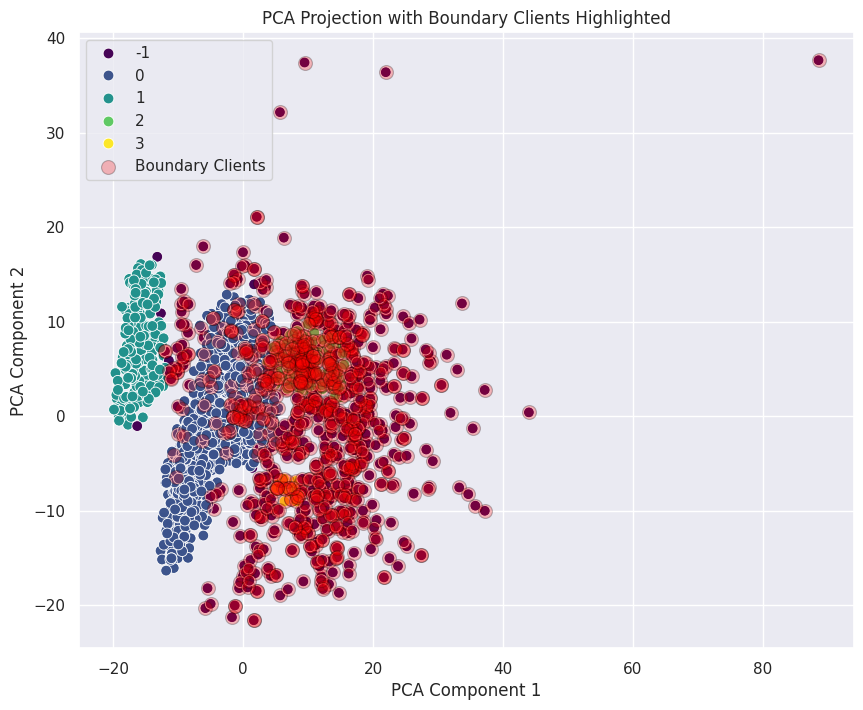

In [600]:
data_scaled['PCA Component 1'] = pca_embedding[:, 0]
data_scaled['PCA Component 2'] = pca_embedding[:, 1]

boundary_clients = data_scaled[data_scaled['Cluster'] == -1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_embedding[:, 0], y=pca_embedding[:, 1], hue=clusters, palette='viridis', s=60, alpha=0.99)

sns.scatterplot(x=boundary_clients['PCA Component 1'], y=boundary_clients['PCA Component 2'], 
                color='red', label='Boundary Clients', s=100, edgecolor='black', alpha=0.25)

plt.title("PCA Projection with Boundary Clients Highlighted")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


Исходя из нашего анализа, самыми перспективными можно назвать пожилых людей, имеющих высокий доход и небольшую семью.

А также молодых людей, с высокими доходами и небольшими семьями.

Наименее интересными являются многодетные семьи с невысокими доходами.

Попробуйте также применить другие изученные методы кластеризации. Насколько лучше или хуже получился результат?

Попробуем применить K-Means

In [611]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(data_scaled)

new_data["Cluster"] = clusters

unique_clusters = set(clusters)
n_clusters = len(unique_clusters)

print(f"Количество кластеров: {n_clusters}")

Количество кластеров: 3


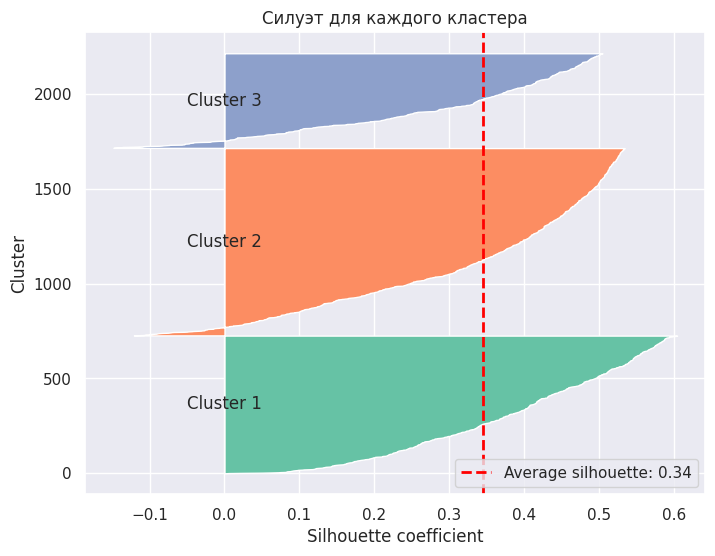

In [612]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(data_scaled, clusters)

avg_silhouette_all = np.mean(silhouette_vals)

fig, ax = plt.subplots(figsize=(8, 6))
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    ax.text(
        -0.05,
        (y_lower + y_upper) / 2,
        f"Cluster {i + 1}",
        fontsize=12,
        verticalalignment="center",
    )
    y_lower += len(cluster_silhouette_vals)

ax.axvline(
    avg_silhouette_all,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Average silhouette: {avg_silhouette_all:.2f}",
)

ax.set_title("Силуэт для каждого кластера")
ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster")
ax.legend()
plt.show()

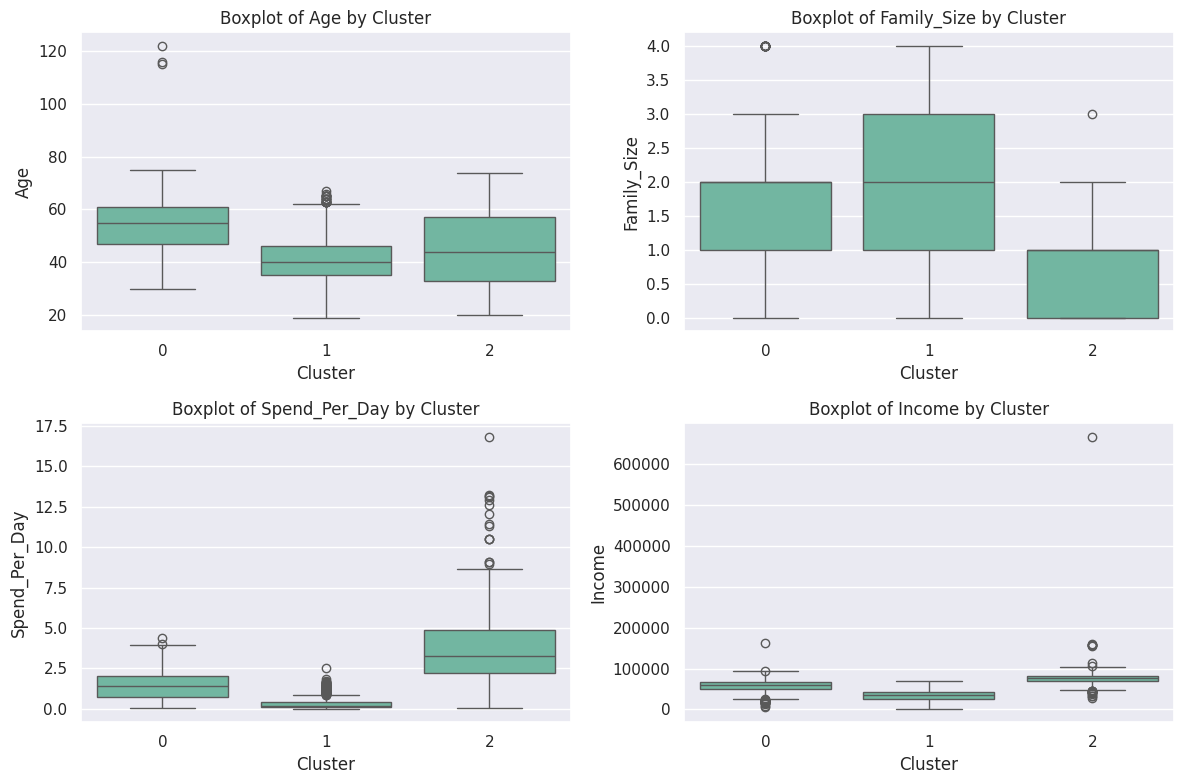

In [613]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Cluster", y=feature, data=new_data[new_data["Cluster"] != -1])
    plt.title(f"Boxplot of {feature} by Cluster")
plt.tight_layout()
plt.show()

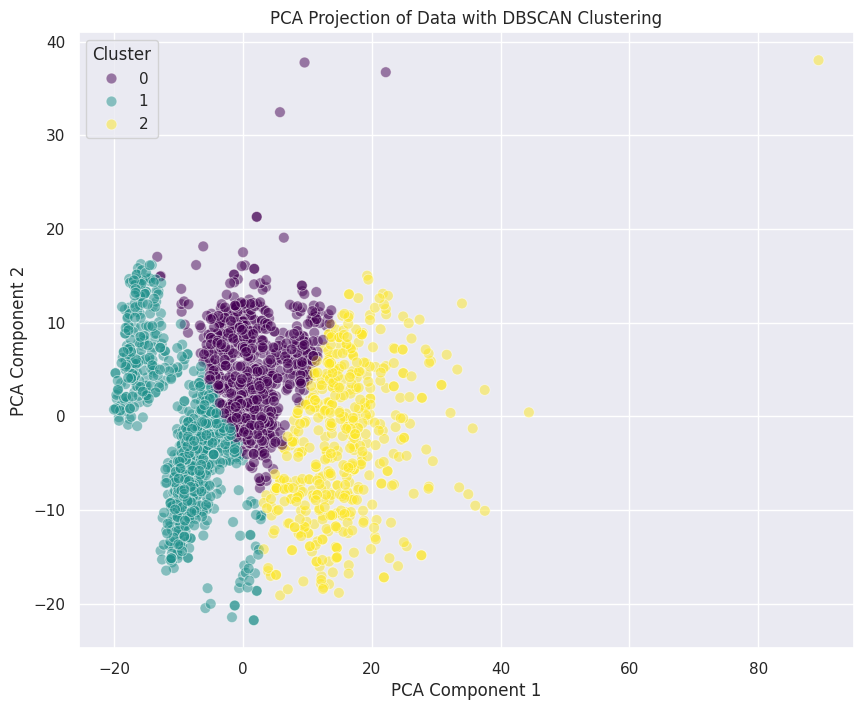

In [614]:
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_embedding[:, 0], y=pca_embedding[:, 1], hue=clusters, palette='viridis', s=60, alpha=0.5)
plt.title("PCA Projection of Data with DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [615]:
cluster_means = new_data[new_data["Cluster"] != -1].groupby("Cluster")[features].mean()
cluster_means

Age  Family_Size  Spend_Per_Day        Income
Cluster                                                     
0        54.426410     1.712517       1.389720  58381.081155
1        40.743175     1.961577       0.315880  35011.601618
2        44.942000     0.688000       3.748411  77420.778000

Здесь опять видим упомянутых выше пожилых людей, а также бедных многодетных.

Но в этот раз, вместо молодых людей, мы видим людей средних лет, с достаточно высоким доходом. По всей видимости, именно доход является разделяющей характеристикой.

Не забывайте про выводы.

**Выводы:** При помощи метода понижения размерности нам удалось классифицировать датасет покупателей.

И DBSCAN, и K-Means позволили выделить интересующие нас перспективные группы людей. Также мы визуализировалм полученные кластеры.